In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta

In [2]:
df = pd.read_csv(r'C:\Users\V0V01S7\Downloads\bquxjob_792c1722_181872f0f81.csv')

In [3]:
df = df[['ACTV_START_TS','ACTL_ACTV_END_TS','ACTV_DUR_MIN_QTY']]

In [4]:
df = df.dropna()

In [5]:
df = df.reset_index(drop=True)

In [6]:
df['ACTV_START_TS'] = pd.to_datetime(df['ACTV_START_TS'])
df['ACTL_ACTV_END_TS'] = pd.to_datetime(df['ACTL_ACTV_END_TS'])

In [7]:
df['ACTV_START_DATE'] = df['ACTV_START_TS'].apply(lambda x: x.date())
df['ACTV_END_DATE'] = df['ACTL_ACTV_END_TS'].apply(lambda x: x.date())
df['ACTV_START_TIME'] = df['ACTV_START_TS'].apply(lambda x: x.time())
df['ACTV_END_TIME'] = df['ACTL_ACTV_END_TS'].apply(lambda x: x.time())

In [8]:
df.head()

,ACTV_START_TS,ACTL_ACTV_END_TS,ACTV_DUR_MIN_QTY,ACTV_START_DATE,ACTV_END_DATE,ACTV_START_TIME,ACTV_END_TIME
0,2021-08-20 11:22:01.958,2021-08-20 11:46:24.031,24.38,2021-08-20,2021-08-20,11:22:01.958000,11:46:24.031000
1,2021-08-20 09:33:13.767,2021-08-20 11:21:53.115,108.67,2021-08-20,2021-08-20,09:33:13.767000,11:21:53.115000
2,2021-08-20 16:07:48.314,2021-08-20 16:10:30.310,2.70,2021-08-20,2021-08-20,16:07:48.314000,16:10:30.310000
3,2021-08-20 16:40:19.276,2021-08-20 18:11:47.686,91.47,2021-08-20,2021-08-20,16:40:19.276000,18:11:47.686000
4,2021-08-20 09:10:23.666,2021-08-20 09:12:37.247,2.23,2021-08-20,2021-08-20,09:10:23.666000,09:12:37.247000


In [9]:
ttime = df.groupby(['ACTV_START_DATE']).sum()
ttime

,ACTV_DUR_MIN_QTY
ACTV_START_DATE,
2021-07-27,185.29
2021-07-28,257.93
2021-07-29,693.86
2021-07-30,646.26
2021-07-31,560.81
...,...
2022-06-16,1.38
2022-06-17,438.10
2022-06-18,85.43


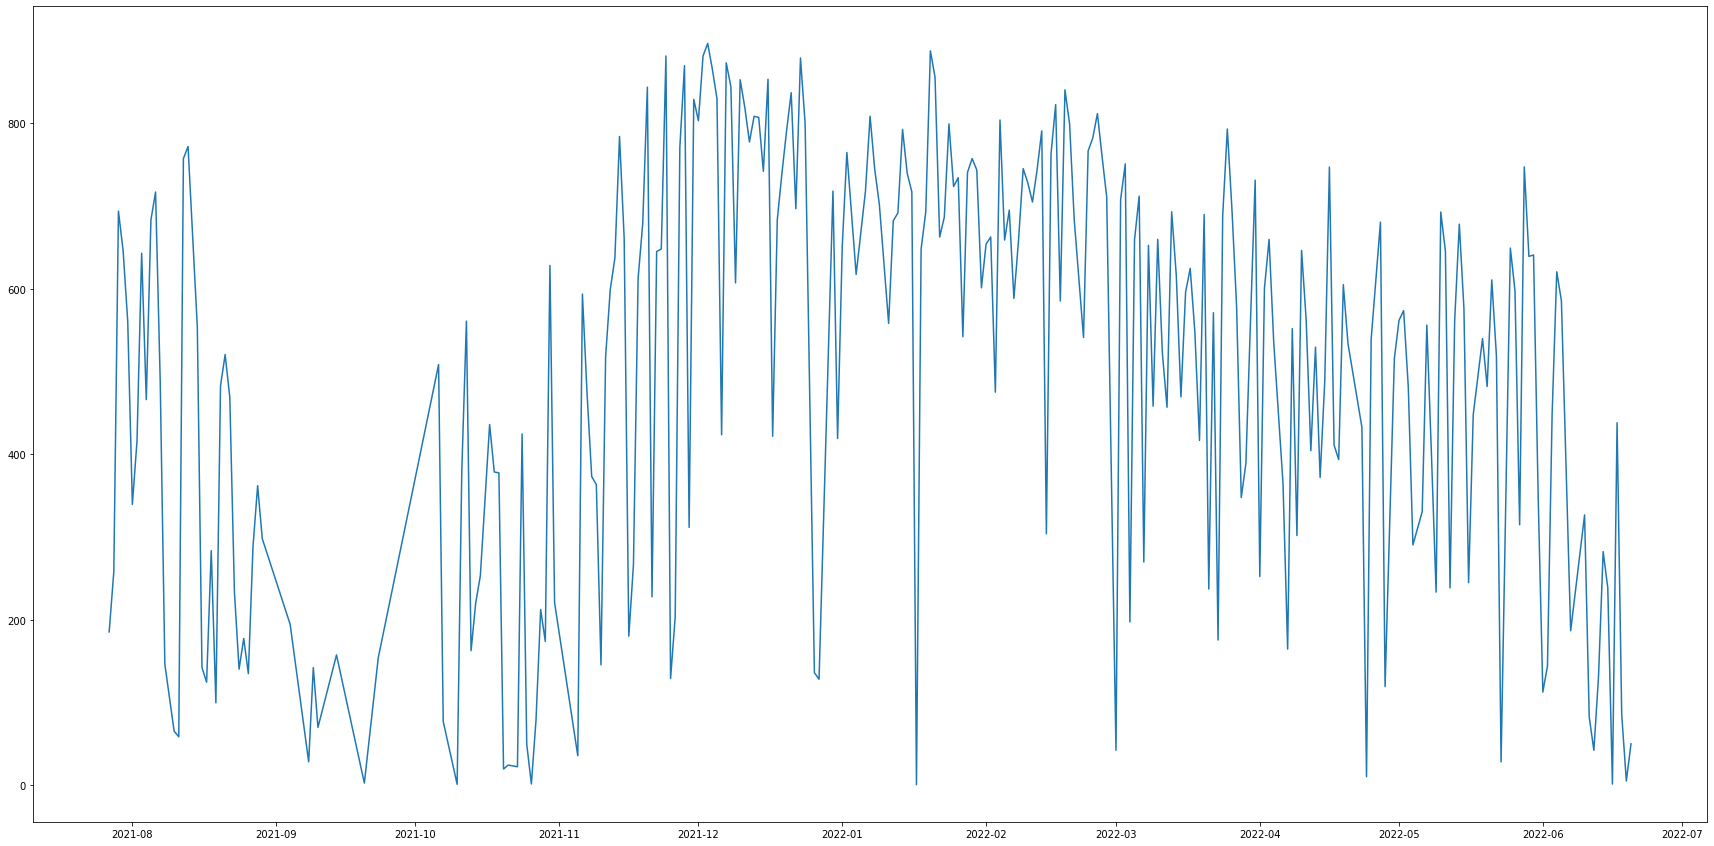

In [11]:
plt.figure(figsize=(30,15))
plt.plot(ttime)

In [12]:
import calendar

In [13]:
calendar.day_name[df.ACTV_START_DATE[0].weekday()]

'Friday'

In [17]:
days_arr = []
for i in range(len(ttime)):
    days_arr.append(calendar.day_name[df.ACTV_START_DATE[i].weekday()])
len(days_arr)

271

In [23]:
ttime['day'] = days_arr
ttime.head(10)

,ACTV_DUR_MIN_QTY,day
ACTV_START_DATE,,
2021-07-27,185.29,Friday
2021-07-28,257.93,Friday
2021-07-29,693.86,Friday
2021-07-30,646.26,Friday
2021-07-31,560.81,Friday
2021-08-01,339.43,Friday
2021-08-02,415.78,Wednesday
2021-08-03,642.98,Wednesday
2021-08-04,466.06,Wednesday


<AxesSubplot:ylabel='day'>

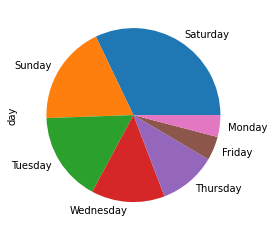

In [27]:
ttime['day'].value_counts().plot(kind='pie')

In [39]:
mon_ttime = ttime[ttime['day'] == 'Monday']
tue_ttime = ttime[ttime['day'] == 'Tuesday']
wed_ttime = ttime[ttime['day'] == 'Wednesday']
thur_ttime = ttime[ttime['day'] == 'Thursday']
fri_ttime = ttime[ttime['day'] == 'Friday']
sat_ttime = ttime[ttime['day'] == 'Saturday']
sun_ttime = ttime[ttime['day'] == 'Sunday']

In [40]:
sun_ttime = sun_ttime.drop(['day'],axis=1)
sat_ttime = sat_ttime.drop(['day'],axis=1)
fri_ttime = fri_ttime.drop(['day'],axis=1)
thur_ttime = thur_ttime.drop(['day'],axis=1)
wed_ttime = wed_ttime.drop(['day'],axis=1)
tue_ttime = tue_ttime.drop(['day'],axis=1)
mon_ttime = mon_ttime.drop(['day'],axis=1)

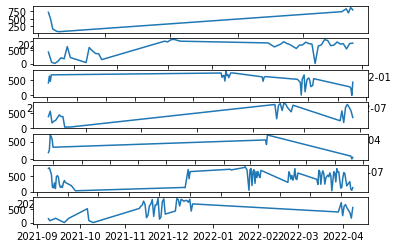

<Figure size 7200x3600 with 0 Axes>

In [45]:
fig, axs = plt.subplots(7)

axs[0].plot(mon_ttime)
axs[1].plot(tue_ttime)
axs[2].plot(wed_ttime)
axs[3].plot(thur_ttime)
axs[4].plot(fri_ttime)
axs[5].plot(sat_ttime)
axs[6].plot(sun_ttime)

In [61]:
hours = df.ACTV_START_TIME.apply(lambda x: x.hour)
#hours = sorted(hours.unique())
hours.value_counts()

10    163
7     156
6     147
11    142
13    139
4     138
15    137
14    136
12    132
8     131
9     129
5     100
16     98
17     95
18     24
3      12
2       2
Name: ACTV_START_TIME, dtype: int64

In [66]:
df['hour_slot'] = hours
hourly_active = df.groupby(['hour_slot']).sum()
hourly_active['normalized_actv'] = (hourly_active.ACTV_DUR_MIN_QTY)/(hourly_active.ACTV_DUR_MIN_QTY.abs().max())
hourly_active

,ACTV_DUR_MIN_QTY,normalized_actv
hour_slot,,
2,21.88,0.001376
3,1069.38,0.067272
4,15896.29,1.000000
5,8405.73,0.528786
6,10727.46,0.674840
7,11894.23,0.748239
8,10507.04,0.660974
9,8734.78,0.549485
10,12131.52,0.763167


In [100]:
max_day = ttime['day'].value_counts().keys()[0]
max_time = hourly_active.idxmax()
print("Driver's most active day is", max_day ,", and most active time is: ", max_time)

Driver's most active day is Saturday , and most active time is:  ACTV_DUR_MIN_QTY    4
normalized_actv     4
dtype: int64


In [101]:
## add features
### spark_market_nm
### count(last_deactivated)
### percentage of deliveries within spark time